In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [155]:
df= pd.read_csv('df_bus_100100073_weather.csv')

In [156]:
df.head()

,Unnamed: 0,baseDateMinute,plainNo,fullSectDist,gpsX,gpsY,sectionId,stopFlag,congetion,busRouteId,seq,station_x,stationNm_x,nx_x,ny_x,station_y,stationNm_y,nx_y,ny_y,preStation_x,preSeq,prePlainNo,preBaseDateTime,seqDiff,nextBaseDateTime,nextPlainNo,baseDateHour,interval,nx,ny,PTY,REH,RN1,T1H,UUU,VEC,VVV,WSD
0,0,202108101042,서울70사6587,0.619,126.904464,37.575563,112602628,1,3,100100073,12,112000001,북가좌동삼거리,59,127,112000003,DMC래미안e.편한세상요진아파트,59,127,111000007,11.0,서울70사6587,202108101041,1.0,202108101044,서울70사6587,2021081010,2,59,127,0,62,0.0,28.9,-0.4,153,1.0,1.1
1,1,202108101044,서울70사6587,0.561,126.909702,37.571645,112602629,0,3,100100073,13,112000003,DMC래미안e.편한세상요진아파트,59,127,112000005,모래내시장.가좌역,59,127,112000001,12.0,서울70사6587,202108101042,1.0,202108101046,서울70사6587,2021081010,2,59,127,0,62,0.0,28.9,-0.4,153,1.0,1.1
2,2,202108101046,서울70사6587,0.324,126.914576,37.569268,112602300,1,3,100100073,14,112000005,모래내시장.가좌역,59,127,112000007,사천교,59,127,112000003,13.0,서울70사6587,202108101044,1.0,202108101048,서울70사6587,2021081010,2,59,127,0,62,0.0,28.9,-0.4,153,1.0,1.1
3,3,202108101048,서울70사6587,0.634,126.917966,37.567651,112603411,1,3,100100073,15,112000007,사천교,59,127,112000008,연희104고지앞.구성산회관,59,127,112000005,14.0,서울70사6587,202108101046,1.0,202108101051,서울70사6587,2021081010,3,59,127,0,62,0.0,28.9,-0.4,153,1.0,1.1
4,4,202108101051,서울70사6587,0.825,126.925254,37.566290,112602251,1,3,100100073,16,112000008,연희104고지앞.구성산회관,59,127,112000010,서대문우체국,59,127,112000007,15.0,서울70사6587,202108101048,1.0,202108101053,서울70사6587,2021081010,2,59,127,0,62,0.0,28.9,-0.4,153,1.0,1.1


In [157]:
df=df[df['stationNm_x'].isin(['순천향대학병원.한남오거리신사역','푸른저축은행,논현역','지하철2호선강남역','신분당선강남역','래미안아파트','파이낸셜뉴스'])
  ]

In [83]:
# df.columns

In [158]:
df=df[['baseDateMinute', 'fullSectDist', 'gpsX',
       'gpsY', 'sectionId', 'stopFlag', 'congetion', 'busRouteId', 'seq',
       'station_x', 'nx_x', 'ny_x', 'station_y', 
       'nx_y', 'ny_y', 'preStation_x', 'preSeq',
       'preBaseDateTime', 'seqDiff', 'nextBaseDateTime',
       'interval', 'baseDateHour', 'nx', 'ny', 'PTY', 'REH', 'RN1', 'T1H',
       'UUU', 'VEC', 'VVV', 'WSD']]

In [159]:
df

,baseDateMinute,fullSectDist,gpsX,gpsY,sectionId,stopFlag,congetion,busRouteId,seq,station_x,nx_x,ny_x,station_y,nx_y,ny_y,preStation_x,preSeq,preBaseDateTime,seqDiff,nextBaseDateTime,interval,baseDateHour,nx,ny,PTY,REH,RN1,T1H,UUU,VEC,VVV,WSD
268,202108101139,0.695,127.026561,37.499838,121607992,0,3,100100073,34,121000011,61,125,121000009,61,125,121000013,33.0,202108101135,1.0,202108101141,2,2021081011,61,125,0,58,0.0,30.3,0.4,202,1.0,1.1
269,202108101141,0.494,127.028312,37.496119,122600078,1,3,100100073,35,121000009,61,125,121000007,61,125,121000011,34.0,202108101139,1.0,202108101145,4,2021081011,61,125,0,58,0.0,30.3,0.4,202,1.0,1.1
281,202108101113,0.687,127.028444,37.496485,121607970,0,3,100100073,58,121000010,61,125,121000012,61,125,121000008,57.0,202108101110,1.0,202108101115,2,2021081011,61,125,0,58,0.0,30.3,0.4,202,1.0,1.1
282,202108101115,0.667,127.026484,37.500633,121607972,1,3,100100073,59,121000012,61,125,121000014,61,125,121000010,58.0,202108101113,1.0,202108101118,3,2021081011,61,125,0,58,0.0,30.3,0.4,202,1.0,1.1
291,202108101134,0.687,127.029225,37.494841,121607970,1,3,100100073,58,121000010,61,125,121000012,61,125,121000008,57.0,202108101131,1.0,202108101139,5,2021081011,61,125,0,58,0.0,30.3,0.4,202,1.0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25307,202108140845,0.695,127.025438,37.501817,121607992,1,3,100100073,34,121000011,61,125,121000009,61,125,121000013,33.0,202108140844,1.0,202108140848,3,2021081408,61,125,0,63,0.0,25.8,-1.3,60,-0.7,1.6
25308,202108140848,0.494,127.028508,37.495707,122600078,1,3,100100073,35,121000009,61,125,121000007,61,125,121000011,34.0,202108140845,1.0,202108140852,4,2021081408,61,125,0,63,0.0,25.8,-1.3,60,-0.7,1.6
25314,202108140858,0.695,127.025743,37.501592,121607992,0,3,100100073,34,121000011,61,125,121000009,61,125,121000013,33.0,202108140855,1.0,202108140900,2,2021081408,61,125,0,63,0.0,25.8,-1.3,60,-0.7,1.6
25321,202108140856,0.687,127.029280,37.494727,121607970,1,3,100100073,58,121000010,61,125,121000012,61,125,121000008,57.0,202108140853,1.0,202108140900,4,2021081408,61,125,0,63,0.0,25.8,-1.3,60,-0.7,1.6


In [160]:
df['baseDateMinute']=df['baseDateMinute'].astype(str)

In [161]:
# df['baseDateMinute']=
df['baseDateMinute']=df['baseDateMinute'].str[-4:]

In [162]:
df['baseDateMinute']= df['baseDateMinute'].astype(int)

In [8]:
# df.drop({'Unnamed: 0'},axis=1,inplace=True)

In [163]:
df_y= df['interval']

In [164]:
df_X = df.drop({'interval'},axis=1)

In [165]:
df_X.head()

,baseDateMinute,fullSectDist,gpsX,gpsY,sectionId,stopFlag,congetion,busRouteId,seq,station_x,nx_x,ny_x,station_y,nx_y,ny_y,preStation_x,preSeq,preBaseDateTime,seqDiff,nextBaseDateTime,baseDateHour,nx,ny,PTY,REH,RN1,T1H,UUU,VEC,VVV,WSD
268,1139,0.695,127.026561,37.499838,121607992,0,3,100100073,34,121000011,61,125,121000009,61,125,121000013,33.0,202108101135,1.0,202108101141,2021081011,61,125,0,58,0.0,30.3,0.4,202,1.0,1.1
269,1141,0.494,127.028312,37.496119,122600078,1,3,100100073,35,121000009,61,125,121000007,61,125,121000011,34.0,202108101139,1.0,202108101145,2021081011,61,125,0,58,0.0,30.3,0.4,202,1.0,1.1
281,1113,0.687,127.028444,37.496485,121607970,0,3,100100073,58,121000010,61,125,121000012,61,125,121000008,57.0,202108101110,1.0,202108101115,2021081011,61,125,0,58,0.0,30.3,0.4,202,1.0,1.1
282,1115,0.667,127.026484,37.500633,121607972,1,3,100100073,59,121000012,61,125,121000014,61,125,121000010,58.0,202108101113,1.0,202108101118,2021081011,61,125,0,58,0.0,30.3,0.4,202,1.0,1.1
291,1134,0.687,127.029225,37.494841,121607970,1,3,100100073,58,121000010,61,125,121000012,61,125,121000008,57.0,202108101131,1.0,202108101139,2021081011,61,125,0,58,0.0,30.3,0.4,202,1.0,1.1


In [166]:
# pd.set_option('display.max_columns', None)

In [167]:
df_y.value_counts()

3    715
4    299
2    273
5    104
1     41
6      6
0      1
7      1
Name: interval, dtype: int64

In [168]:
# df_X

In [169]:
train_X, val_X, train_y, val_y = train_test_split(df_X, df_y, random_state=1)


rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.4f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0.6417


In [121]:
rf_val_predictions=pd.Series(rf_val_predictions)

In [122]:
# pd.concat([rf_val_predictions,val_y,val_X],axis=1)

# pd.Series(rf_val_predictions)

#  pd.concat([df_0,df_route_st])

,0,interval,baseDateMinute,fullSectDist,gpsX,gpsY,sectionId,stopFlag,congetion,busRouteId,seq,station_x,nx_x,ny_x,station_y,nx_y,ny_y,preStation_x,preSeq,preBaseDateTime,seqDiff,nextBaseDateTime,baseDateHour,nx,ny,PTY,REH,RN1,T1H,UUU,VEC,VVV,WSD
0,2.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24622,NaN,2.0,1727.0,0.667,127.026414,37.500781,121607972.0,1.0,3.0,100100073.0,59.0,121000012.0,61.0,125.0,121000014.0,61.0,125.0,121000010.0,58.0,2.021081e+11,1.0,2.021081e+11,2.021081e+09,61.0,125.0,0.0,54.0,0.0,28.0,-1.8,72.0,-0.5,2.0
24679,NaN,5.0,857.0,0.695,127.025590,37.501913,121607992.0,1.0,3.0,100100073.0,34.0,121000011.0,61.0,125.0,121000009.0,61.0,125.0,121000013.0,33.0,2.021082e+11,1.0,2.021082e+11,2.021082e+09,61.0,125.0,0.0,55.0,0.0,26.7,-1.1,81.0,-0.1,1.2
24681,NaN,5.0,853.0,0.494,127.028453,37.495823,122600078.0,1.0,3.0,100100073.0,35.0,121000009.0,61.0,125.0,121000007.0,61.0,125.0,121000011.0,34.0,2.021082e+11,1.0,2.021082e+11,2.021082e+09,61.0,125.0,0.0,55.0,0.0,26.7,-1.1,81.0,-0.1,1.2
24752,NaN,3.0,950.0,0.687,127.029203,37.494888,121607970.0,1.0,3.0,100100073.0,58.0,121000010.0,61.0,125.0,121000012.0,61.0,125.0,121000008.0,57.0,2.021081e+11,1.0,2.021081e+11,2.021081e+09,61.0,125.0,0.0,57.0,0.0,30.5,0.7,210.0,1.2,1.4


In [125]:
len(rf_val_predictions)

360

In [127]:
val_y.reset_index

<bound method Series.reset_index of 22932    2
6182     4
14323    3
1010     2
15993    2
        ..
6285     3
24031    3
22801    3
3679     3
23322    2
Name: interval, Length: 360, dtype: int64>

In [126]:
val_X.reset_index

<bound method DataFrame.reset_index of        baseDateMinute  fullSectDist        gpsX       gpsY  sectionId  \
22932            1107         0.695  127.026863  37.499438  121607992   
6182             1011         0.494  127.028485  37.495754  122600078   
14323            1030         0.667  127.026533  37.500529  121607972   
1010             1538         0.687  127.029083  37.495141  121607970   
15993            1511         0.687  127.029159  37.494980  121607970   
...               ...           ...         ...        ...        ...   
6285             1033         0.667  127.026532  37.500530  121607972   
24031            1702         0.695  127.025811  37.501450  121607992   
22801            1417         0.695  127.026041  37.500965  121607992   
3679             1743         0.494  127.028376  37.495984  122600078   
23322            1620         0.687  127.029207  37.494879  121607970   

       stopFlag  congetion  busRouteId  seq  station_x  nx_x  ny_x  station_y  \
229

In [129]:
a=pd.concat([rf_val_predictions.reset_index(),val_y.reset_index(),val_X.reset_index()],axis=1)

In [132]:
b=a.columns.tolist()

In [133]:
['index',
 0,
 'index',
 'interval',
 'index',
 'baseDateMinute',
 'fullSectDist',
 'gpsX',
 'gpsY',
 'sectionId',
 'stopFlag',
 'congetion',
 'busRouteId',
 'seq',
 'station_x',
 'nx_x',
 'ny_x',
 'station_y',
 'nx_y',
 'ny_y',
 'preStation_x',
 'preSeq',
 'preBaseDateTime',
 'seqDiff',
 'nextBaseDateTime',
 'baseDateHour',
 'nx',
 'ny',
 'stationNm'
 'PTY',
 'REH',
 'RN1',
 'T1H',
 'UUU',
 'VEC',
 'VVV',
 'WSD']

['index',
 0,
 'index',
 'interval',
 'index',
 'baseDateMinute',
 'fullSectDist',
 'gpsX',
 'gpsY',
 'sectionId',
 'stopFlag',
 'congetion',
 'busRouteId',
 'seq',
 'station_x',
 'nx_x',
 'ny_x',
 'station_y',
 'nx_y',
 'ny_y',
 'preStation_x',
 'preSeq',
 'preBaseDateTime',
 'seqDiff',
 'nextBaseDateTime',
 'baseDateHour',
 'nx',
 'ny',
 'PTY',
 'REH',
 'RN1',
 'T1H',
 'UUU',
 'VEC',
 'VVV',
 'WSD']

# feature importance

In [ ]:
df

<AxesSubplot:>

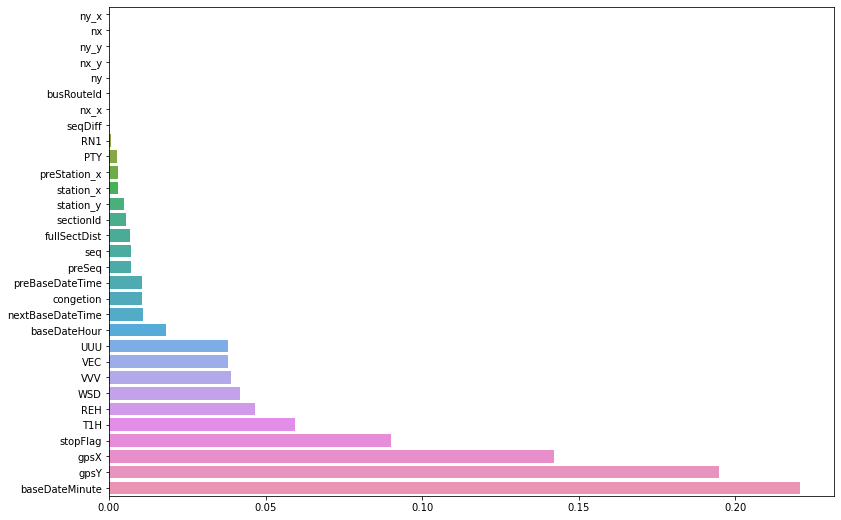

In [115]:
rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(df_X,df_y)

feature_series = pd.Series(data=rf_reg.feature_importances_, index = df_X.columns)
feature_series = feature_series.sort_values(ascending=True)
plt.figure(figsize=(13,9))
sns.barplot(x= feature_series, y = feature_series.index)